TTTT Analysis
======
This Notebook is simply a playground to examine the resulting histograms from the main TTTT analysis executable.

In [1]:
import ROOT
%load_ext autoreload
%autoreload 2
from utils import HistCollection as HC
from utils import show_event

Welcome to JupyROOT 6.08/02


First, we need to load(and optionally rebuild) the histogram datafiles. These will generally contain a set of histograms of various quantities calculated from data in the input MiniTrees.

In [2]:
rebuild_hists=True
hists_TTTT = HC("TTTT", "../data/TTTT_ext_treeProducerSusyMultilepton_tree.root", rebuild_hists=rebuild_hists)
hists_TTZ = HC("TTZ", "../data/TTZToLLNuNu_treeProducerSusyMultilepton_tree.root", rebuild_hists=rebuild_hists)
hists_TTW = HC("TTW", "../data/TTWToLNu_treeProducerSusyMultilepton_tree.root", rebuild_hists=rebuild_hists)

Writing log data to ../data/TTTT_ext_treeProducerSusyMultilepton_tree_result.log
Writing log data to ../data/TTZToLLNuNu_treeProducerSusyMultilepton_tree_result.log
Writing log data to ../data/TTWToLNu_treeProducerSusyMultilepton_tree_result.log


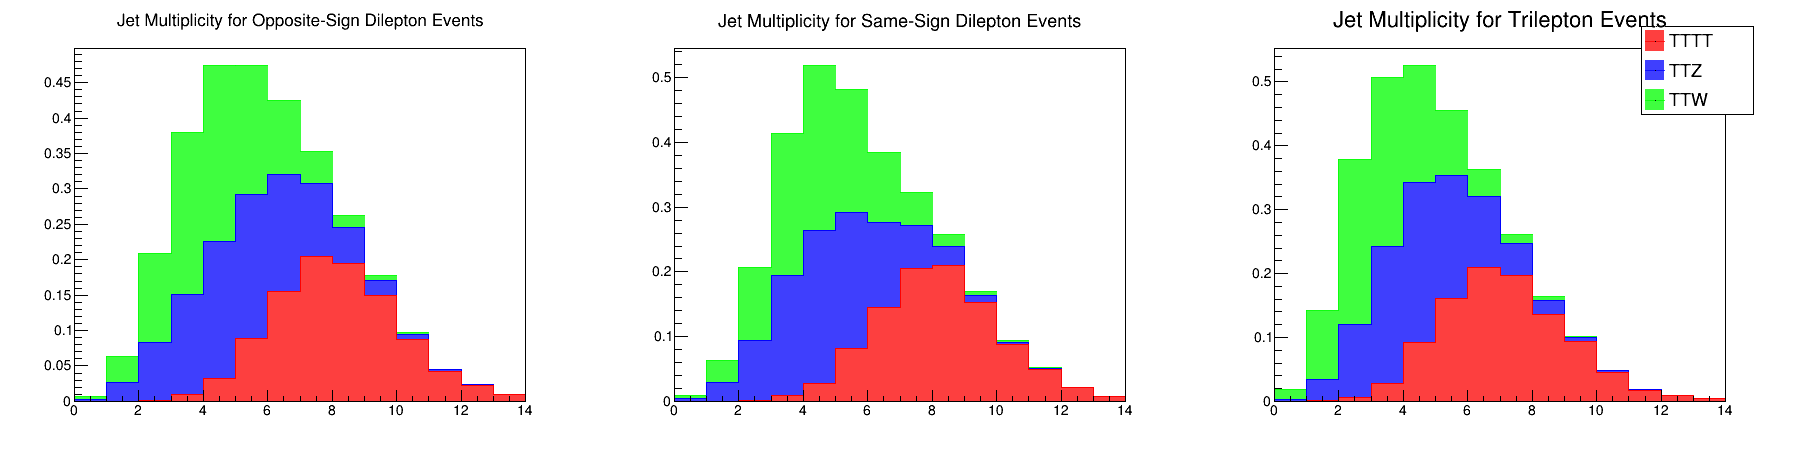

In [3]:
HC.canvas.Clear()
HC.stack_hist_array(*zip(('jet_count_os_dilepton','Jet Multiplicity for Opposite-Sign Dilepton Events'),
                         ('jet_count_ss_dilepton','Jet Multiplicity for Same-Sign Dilepton Events'),
                         ('jet_count_trilepton', 'Jet Multiplicity for Trilepton Events')
                        ),
                    normalize_to=1,
                    enable_fill=True,
                    shape=(3,1),
                   )
                    
HC.canvas.Draw()

We can use the `show_event` function to look at the Generator-Level particles for the event. They are color-coded based on their pt relative to the maximum pt of a particles in the event. Green means higher, red means lower

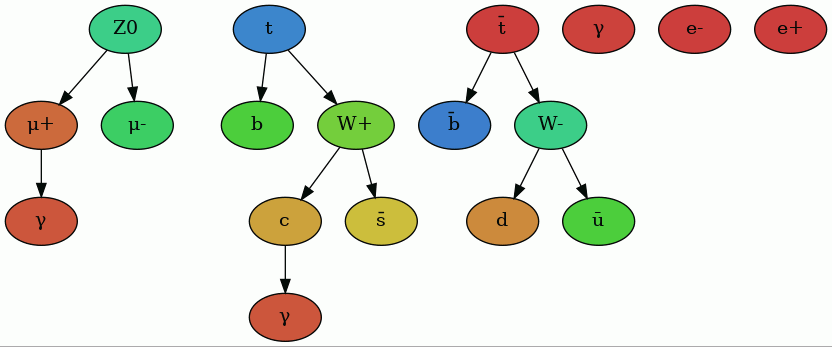

In [4]:
show_event(hists_TTZ, 3)

<ROOT.THStack object ("lepton_count_stack") at 0xa728ec0>

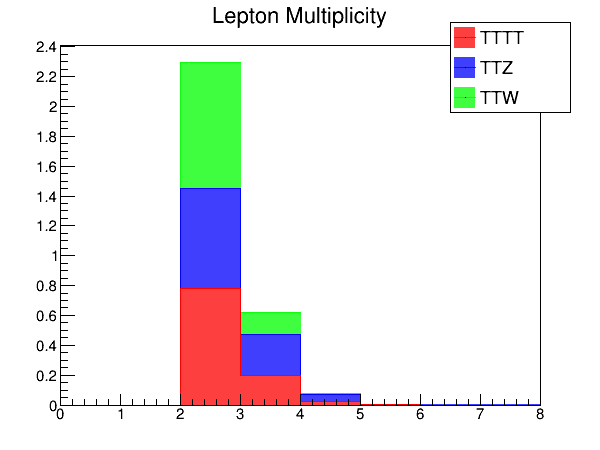

In [5]:
HC.stack_hist("lepton_count", title="Lepton Multiplicity",
              enable_fill=True, normalize_to=1, make_legend=True, draw=True)

<ROOT.THStack object ("b_jet_count_stack") at 0x63428c0>

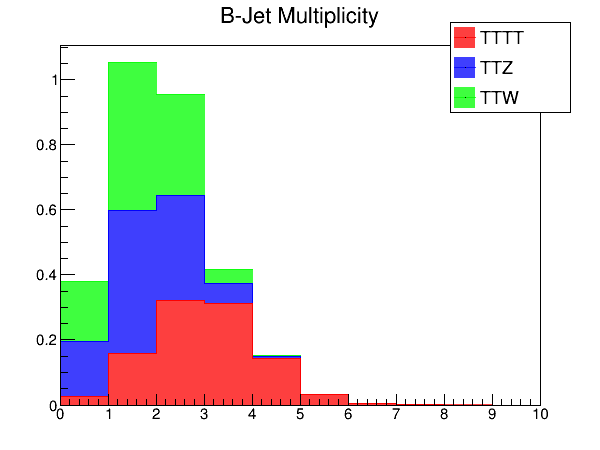

In [6]:
HC.stack_hist("b_jet_count", title="B-Jet Multiplicity",
              enable_fill=True, normalize_to=1, make_legend=True, draw=True)

The `draw` method of the HistCollection class simply creates a grid of plots showing all of the drawable objects(i.e. objects with a `Draw` method) contained in the input file.

Warning in <TROOT::Append>: Replacing existing TH1: TTTT:nLepvsnJet (Potential memory leak).


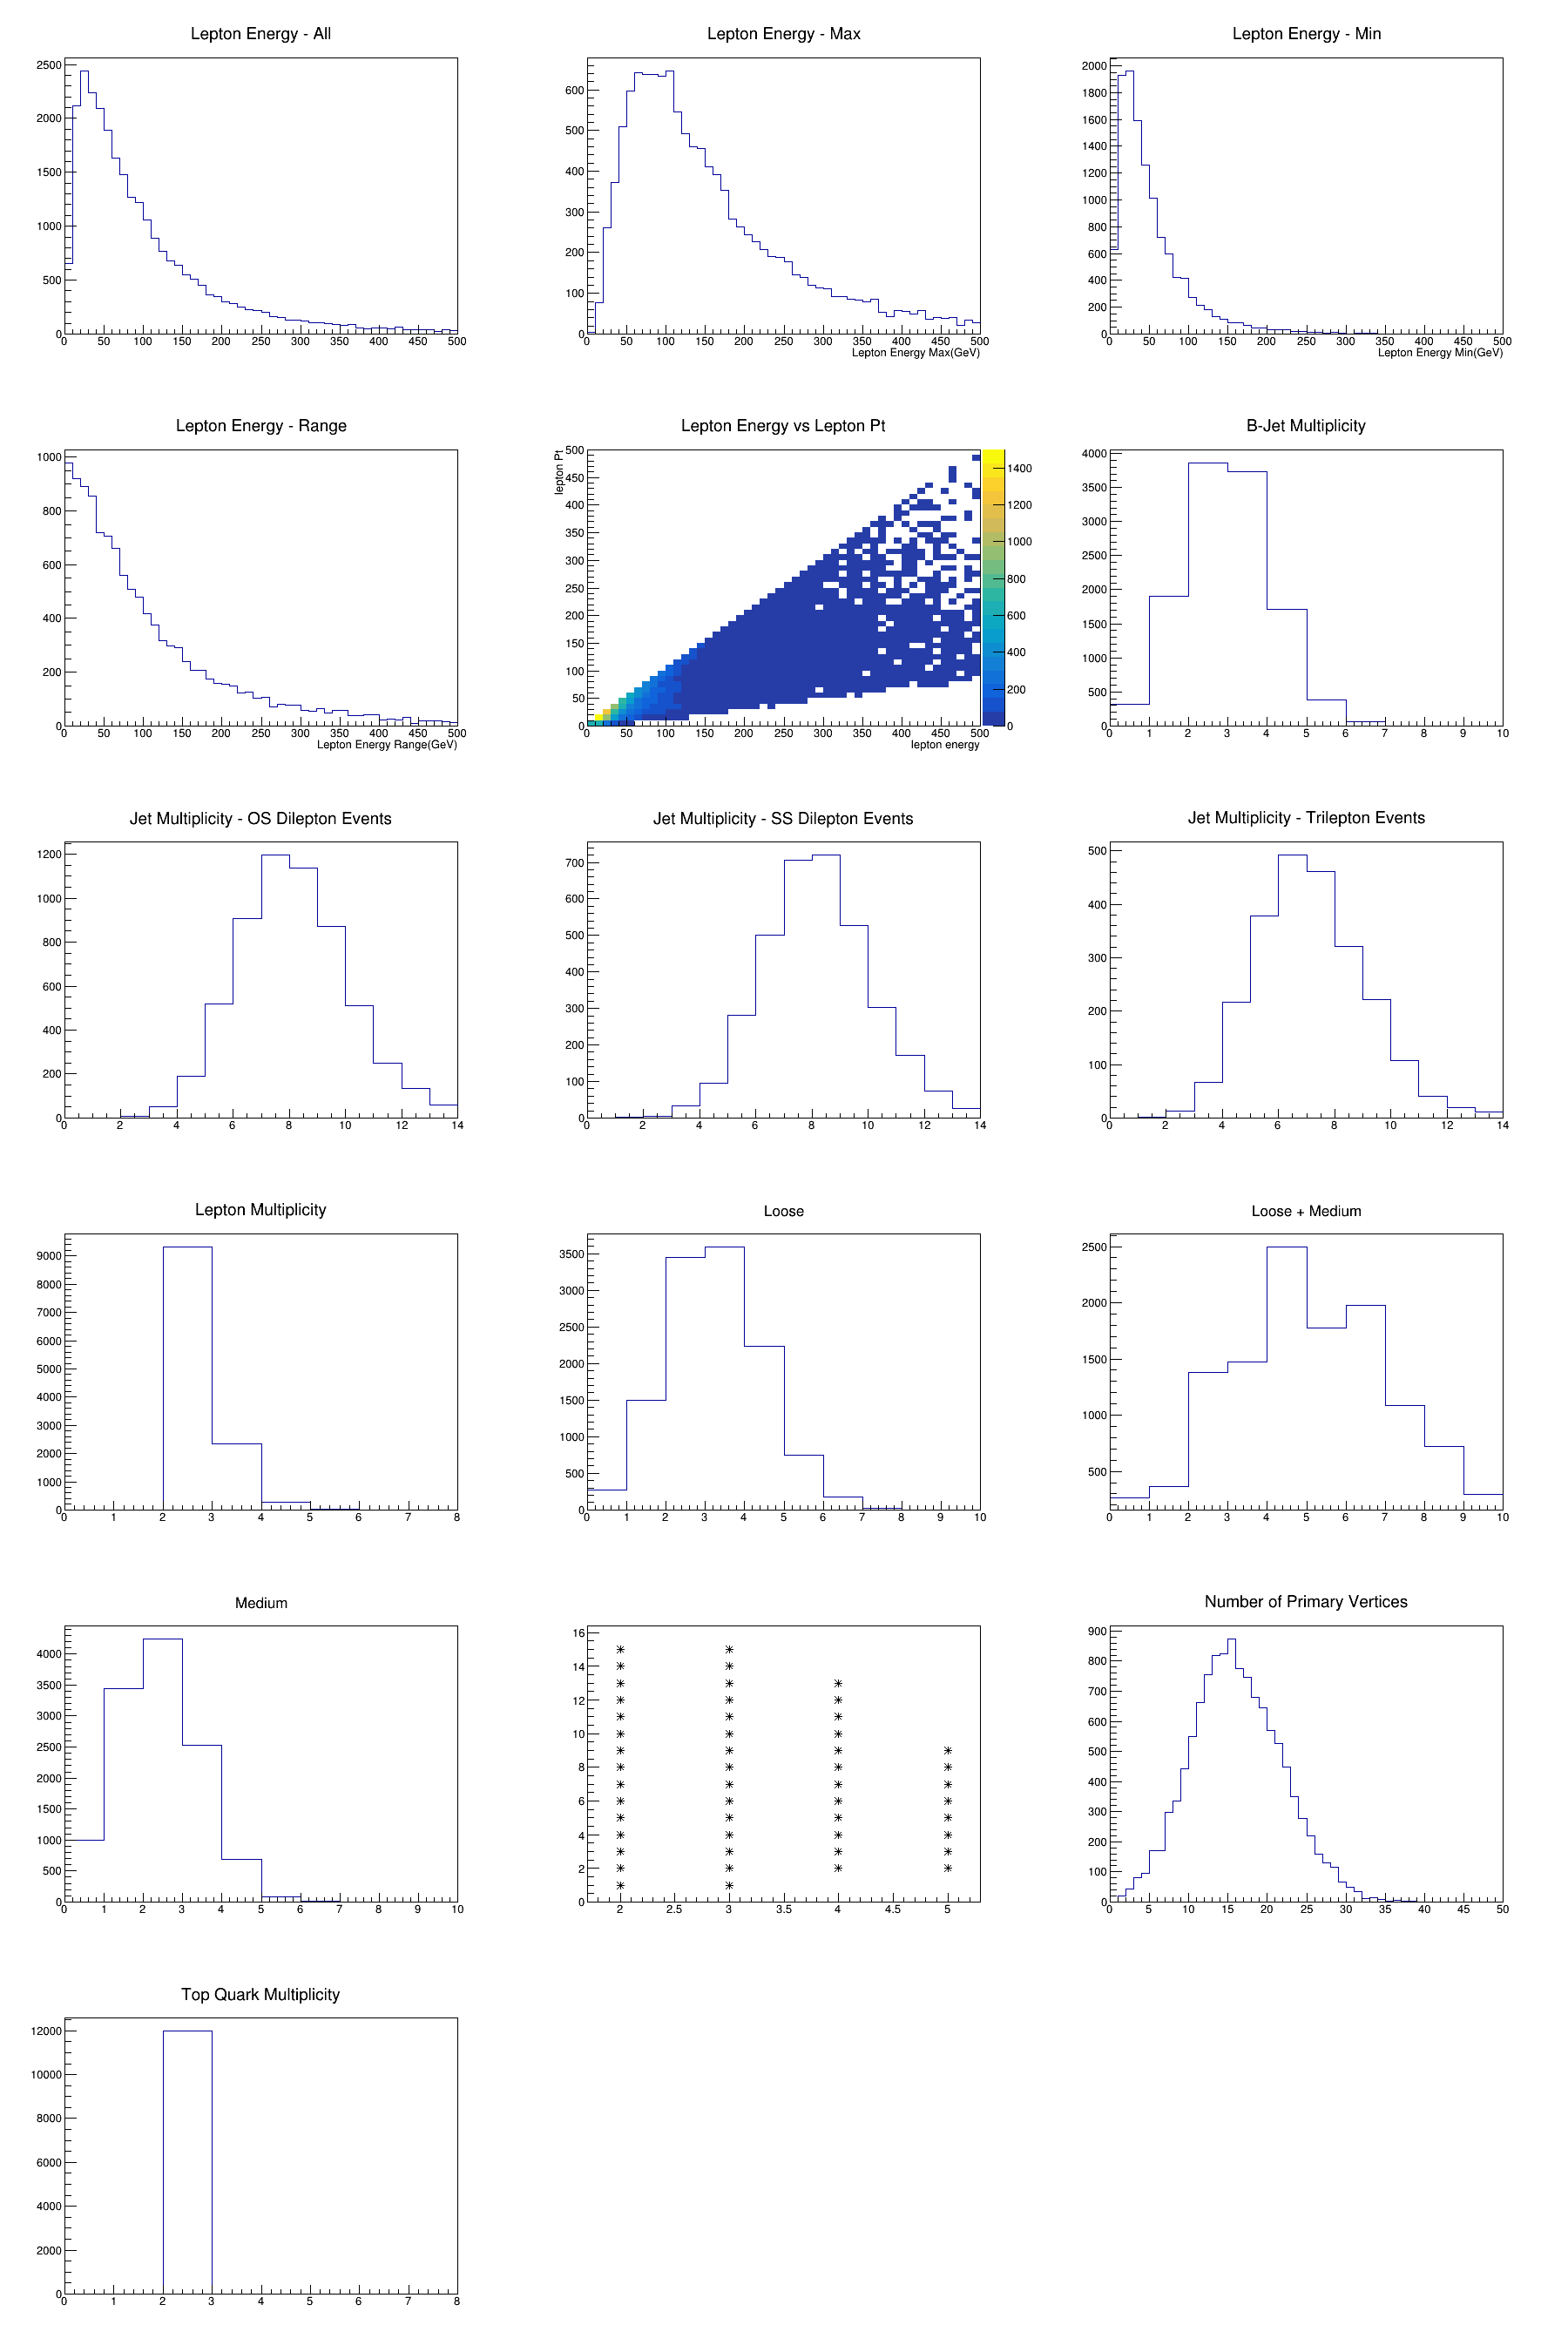

In [7]:
hists_TTTT.draw()

Warning in <TROOT::Append>: Replacing existing TH1: TTZ:nLepvsnJet (Potential memory leak).


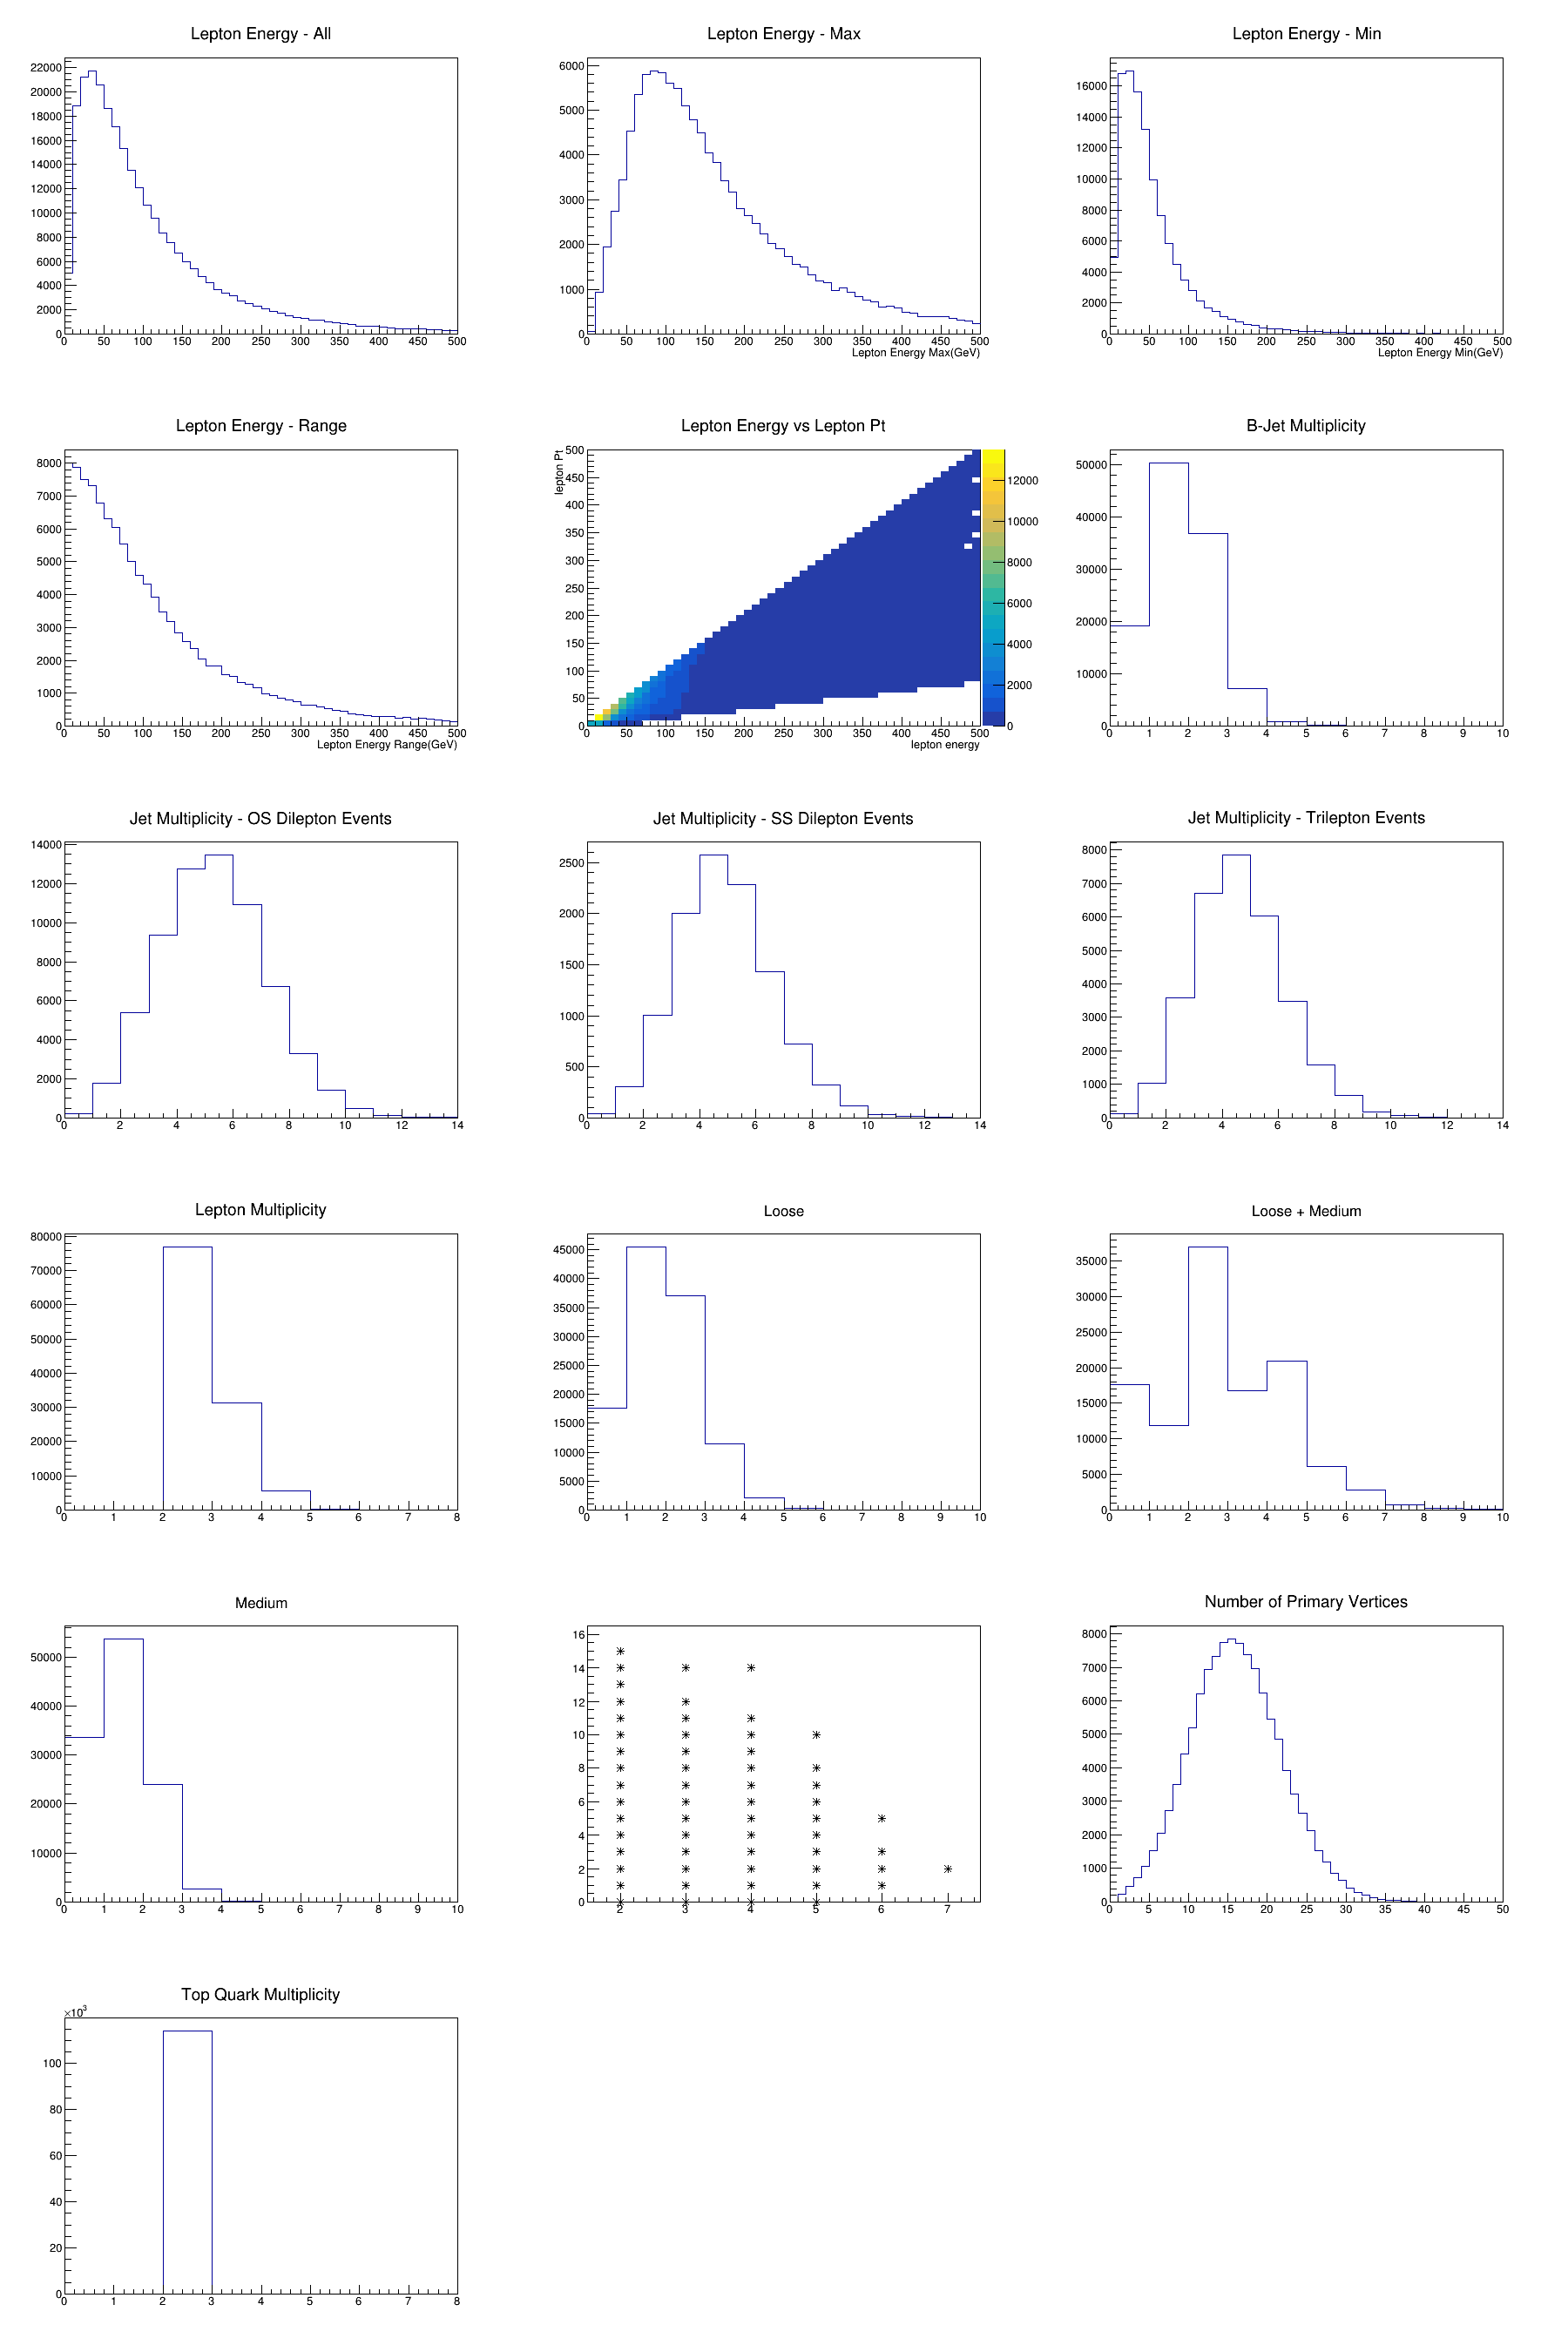

In [8]:
hists_TTZ.draw()

Warning in <TROOT::Append>: Replacing existing TH1: TTW:nLepvsnJet (Potential memory leak).


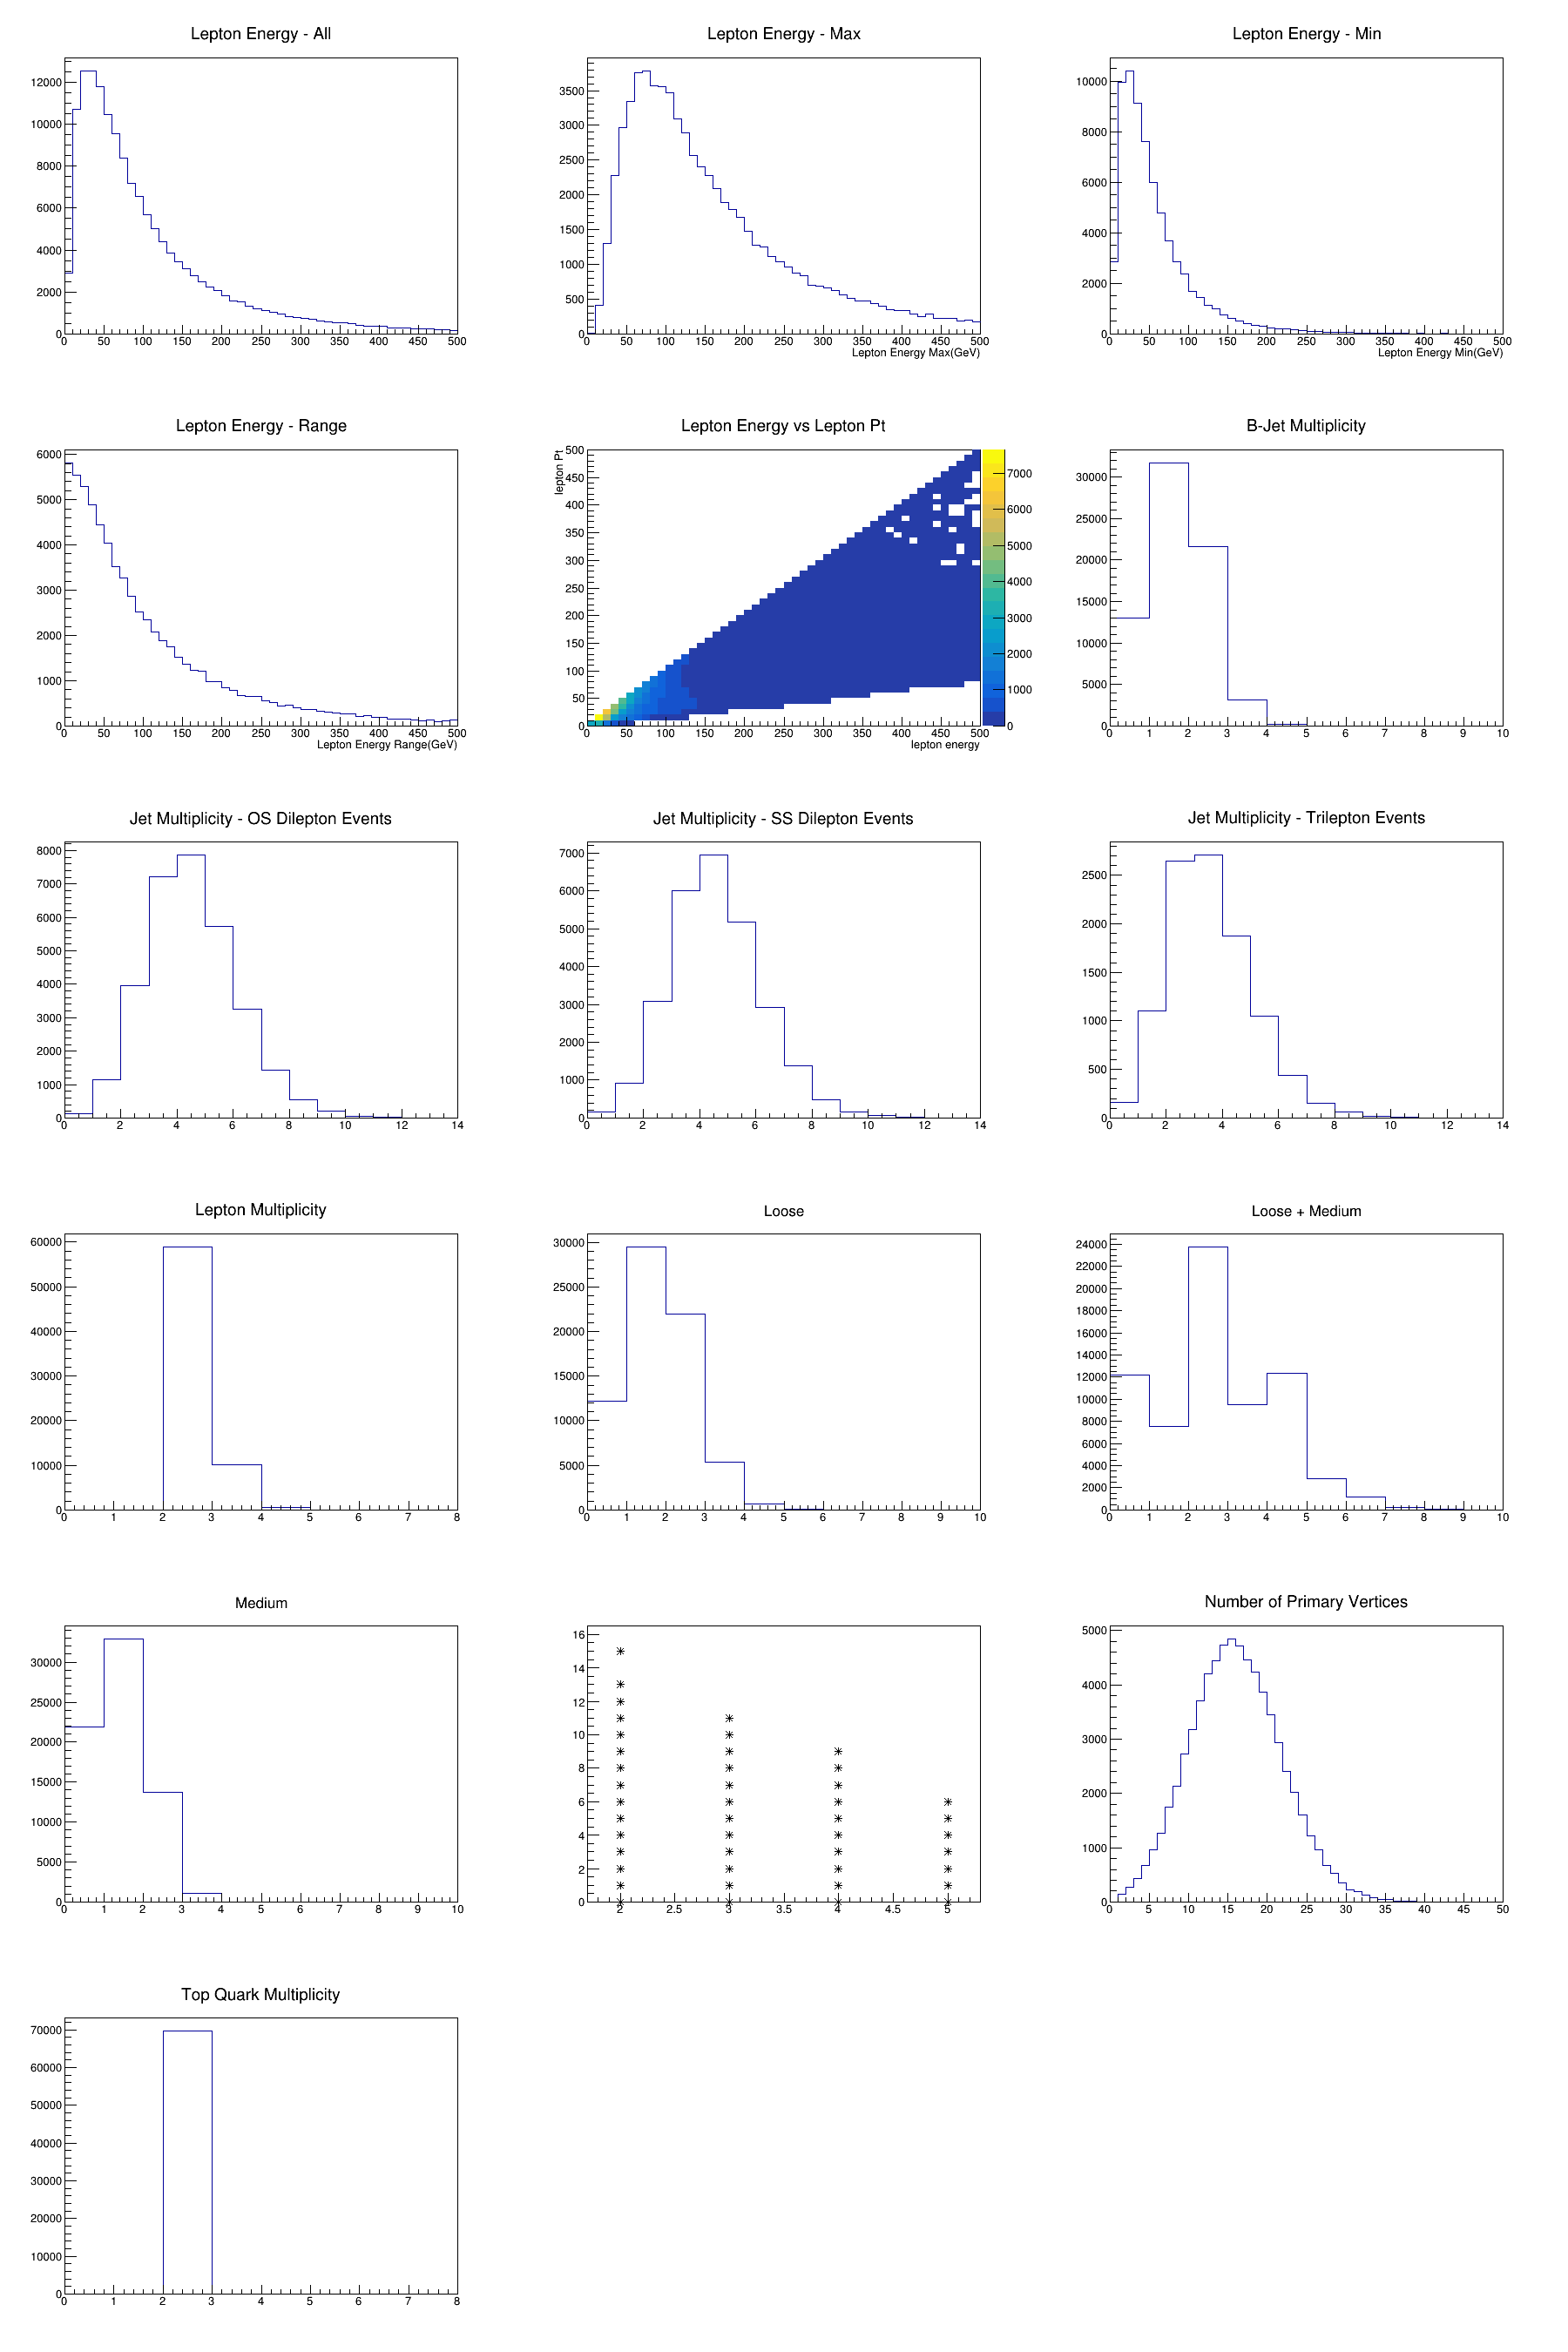

In [9]:
hists_TTW.draw()